##**Read in data and NLTK basics**

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import nltk

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Amazon reviews dataset/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [12]:
df.shape  #As you can see there are just above half a million reviews in this dataset

(568454, 10)

In [13]:
#Here I'll use only few reviews for training
df = df.head(1000)
df.shape

(1000, 10)

In [14]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [15]:
print(df['Score'].value_counts())  #this shows how many times each rating (on the rate of 5) has occurred for the reviews

5    642
4    138
1     98
3     75
2     47
Name: Score, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

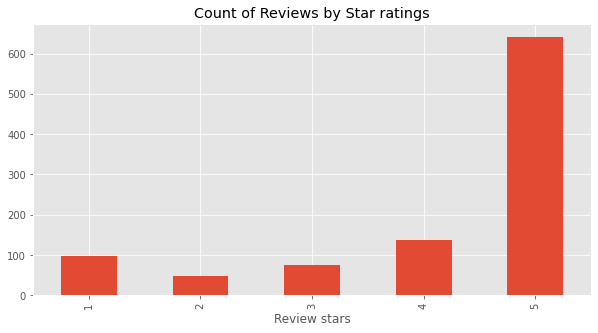

In [16]:
# We'll do a quick EDA (Exploratory Data Analysis)
ax = df['Score'].value_counts().sort_index().plot(kind ='bar', title = 'Count of Reviews by Star ratings', figsize = (10,5))
ax.set_xlabel('Review stars')
plt.show

###**Basic NLTK**

In [17]:
# Basically tokenizing is an important step in data preparation in NLP for further processing.So let's check an example
example = df['Text'][40]
example

"The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap..."

In [18]:
#nltk rovides two types of tokenizing i.e word tokenizing and sentence tokenizing. Punkt is a module that uses an unsupervised algorithm for
#tokenizing the text into a list of sentences or words.
nltk.download('punkt')
sentences = nltk.sent_tokenize(example)
sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['The variety packs taste great!<br /><br />I have them every morning.',
 "At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular.",
 "You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this.",
 'Convenient, healthy, very quick, excellent quality, and extremely cheap...']

In [19]:
 import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [20]:
sent_tags = nltk.pos_tag(sentences)
sent_tags

[('The variety packs taste great!<br /><br />I have them every morning.',
  'NNP'),
 ("At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular.",
  'NNP'),
 ("You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this.",
  'NNP'),
 ('Convenient, healthy, very quick, excellent quality, and extremely cheap...',
  'NNP')]

In [21]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [22]:
sent_entities = nltk.chunk.ne_chunk_sents(sent_tags)
sent_entities

<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x7f627ed8b0d0>

In [23]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['The', 'variety', 'packs', 'taste', 'great', '!', '<', 'br', '/', '>']

In [24]:
nltk.download('averaged_perceptron_tagger')
#POS Tagging (Parts of Speech Tagging) is a process to mark up the words in text format for a particular part of a speech based on its 
#definition and context. It is responsible for text reading in a language and assigning some specific token (Parts of Speech) to each word.
#It is also called grammatical tagging.
tags = nltk.pos_tag(tokens)
tags[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('The', 'DT'),
 ('variety', 'NN'),
 ('packs', 'VBZ'),
 ('taste', 'NN'),
 ('great', 'JJ'),
 ('!', '.'),
 ('<', 'JJ'),
 ('br', 'NN'),
 ('/', 'NNP'),
 ('>', 'NNP')]

In [25]:
#Chunking in NLP is a process to take small pieces of information and group them into large units. The primary use of Chunking is making 
#groups of “noun phrases”.Chunking is used for entity detection. An entity is that part of the sentence by which machine gets the value for
# any intention.Example: "Temperature of Bangalore", here Temperature is an intention and Bangalore is an entity.
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tags)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...


(S
  The/DT
  variety/NN
  packs/VBZ
  taste/NN
  great/JJ
  !/.
  </JJ
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NN
  I/PRP
  have/VBP
  them/PRP
  every/DT
  morning/NN
  ./.
  At/IN
  $/$
  0.30/CD
  cents/NNS
  per/IN
  meal/NN
  ,/,
  I/PRP
  do/VBP
  n't/RB
  understand/VB
  why/WRB
  everyone/NN
  on/IN
  earth/NN
  is/VBZ
  n't/RB
  buying/VBG
  this/DT
  stuff/NN
  up./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Maple/NNP
  and/CC
  brown/JJ
  sugar/NN
  is/VBZ
  terrific/JJ
  ,/,
  followed/VBN
  by/IN
  apples/NNS
  and/CC
  cinnamon/NN
  ,/,
  followed/VBN
  by/IN
  regular/JJ
  ./.
  You/PRP
  do/VBP
  n't/RB
  get/VB
  tired/VBN
  of/IN
  the/DT
  same/JJ
  ole/JJ
  thing/NN
  ,/,
  and/CC
  they/PRP
  taste/VBP
  great./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  I/PRP
  just/RB
  boil/VBP
  water/NN
  from/IN
  a/DT
  small/JJ
  pot/NN
  ,/,
  empty/VBP
  the/DT
  packet/NN
  or/CC
  2/CD
  in/IN
  a/DT
  bowl/

[nltk_data]   Unzipping corpora/words.zip.


##**VADER Sentiment Scoring**
**VADER** - Valence Aware Dictionary sEntiment Reasoner - Bag of Words approach.
VADER takes in all the words of a sentence and each word has a value of Positive, Negative or Neutral and adds or combines up the value for all the words and tells how positive or negative or neutral the sentecne is, but it does not take into account the relationship between words which actually exists  in normal human speech.

In [26]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [27]:
#Here we use the nltk's SentimentIntensityAnalyzer to compute the negative/positive/neutral scores of a text
# The Bag of Words approach includes the following steps:
# It removes all the stopwords from the sentence
# Each word is given a score and combined then to get the overall scores

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm          # this is a progress bar tracker

SIA = SentimentIntensityAnalyzer()


In [28]:
# some sentiment scores analysis with examples
SIA.polarity_scores("I am a Genius!")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [29]:
SIA.polarity_scores("You are lacking practice")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [30]:
SIA.polarity_scores("Is there anything worst than this?")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [31]:
SIA.polarity_scores(example)   #this example is from the dataset

{'neg': 0.033, 'neu': 0.82, 'pos': 0.147, 'compound': 0.9301}

In [32]:
#let's run the polarity_score on the entire dataset
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [33]:
res = {}
for i,row in tqdm(df.iterrows(), total = len(df)):
  text = row['Text']
  id = row['Id']
  res[id] = SIA.polarity_scores(text)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [34]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [35]:
vaders_res = pd.DataFrame(res).T
vaders_res = vaders_res.reset_index().rename(columns = {'index':'Id'})
vaders_res = vaders_res.merge(df, how = 'left')
vaders_res.head()                    # now we have the sentiment score and the metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


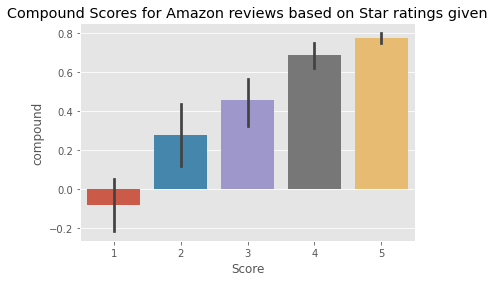

In [36]:
##Plot of VADER results
ax = sns.barplot(data = vaders_res, x = 'Score', y = 'compound')
ax.set_title('Compound Scores for Amazon reviews based on Star ratings given')
plt.show()

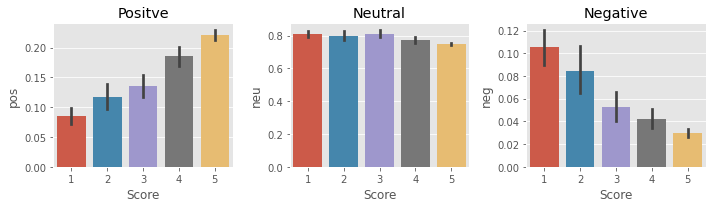

In [37]:
fig, axs = plt.subplots(1,3, figsize = (10,3))
sns.barplot(data = vaders_res, x = "Score", y = 'pos', ax = axs[0])
sns.barplot(data = vaders_res, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data = vaders_res, x = "Score", y = 'neg', ax = axs[2])
axs[0].set_title('Positve')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

#**Roberta Pretrained Model**

In [38]:
#this involves using a model which is already trained with a large corpus of data
#Transformers not only considers the words of a sentence but also the context of all the other words

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [39]:
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

In [41]:
#let's remember the example which we used before
print(example)
SIA.polarity_scores(example)

The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap...


{'neg': 0.033, 'neu': 0.82, 'pos': 0.147, 'compound': 0.9301}

In [47]:
#Run for roberta model
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-1.7814, -0.4193,  2.8065]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [58]:
#It's in the form of a tensor, let's convert it into a numpy array
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.00969057, 0.03783322, 0.95247626], dtype=float32)

In [59]:
#dictionary of the outputs
scores_dict = {'roberta_neg': scores[0], 'roberta_neu':scores[1], 'roberta_pos':scores[2]}
scores_dict

{'roberta_neg': 0.009690567,
 'roberta_neu': 0.037833218,
 'roberta_pos': 0.95247626}

In [60]:
def roberta_polarity_scores(example):
  encoded_text = tokenizer(example, return_tensors = 'pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {'roberta_neg': scores[0], 'roberta_neu':scores[1], 'roberta_pos':scores[2]}
  return scores_dict


In [72]:
res = {}
for i, row in tqdm(df.iterrows(),total = len(df)):
  try:
    text = row['Text']
    id = row['Id']
    vader_result = SIA.polarity_scores(text)
    rename_vader_results = {}
    for key,value in vader_result.items():
      rename_vader_results[f"vader_{key}"] = value
    roberta_result = roberta_polarity_scores(text)
    combined = {**rename_vader_results, **roberta_result}
    res[id] = combined
  except RuntimeError:
    print(f"Couldn't process for id {id}")

#There can be a error when the text is too big for the model to process, so it throws a RuntimeError. to counter that we can use the Try and Except concept which will throw an 
#exception everytime it counters that RuntimeError and skip those examples

  0%|          | 0/1000 [00:00<?, ?it/s]

Couldn't process for id 83
Couldn't process for id 187
Couldn't process for id 529
Couldn't process for id 540
Couldn't process for id 746
Couldn't process for id 863


In [62]:
vader_result

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [63]:
roberta_result

{'roberta_neg': 0.009624219,
 'roberta_neu': 0.049980354,
 'roberta_pos': 0.9403955}

In [73]:
results = pd.DataFrame(res).T
results = results.reset_index().rename(columns = {'index':'Id'})
results = results.merge(df, how = 'left')
results.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##**Comparison of Scores between the VADER and the Roberta models**

In [75]:
results.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

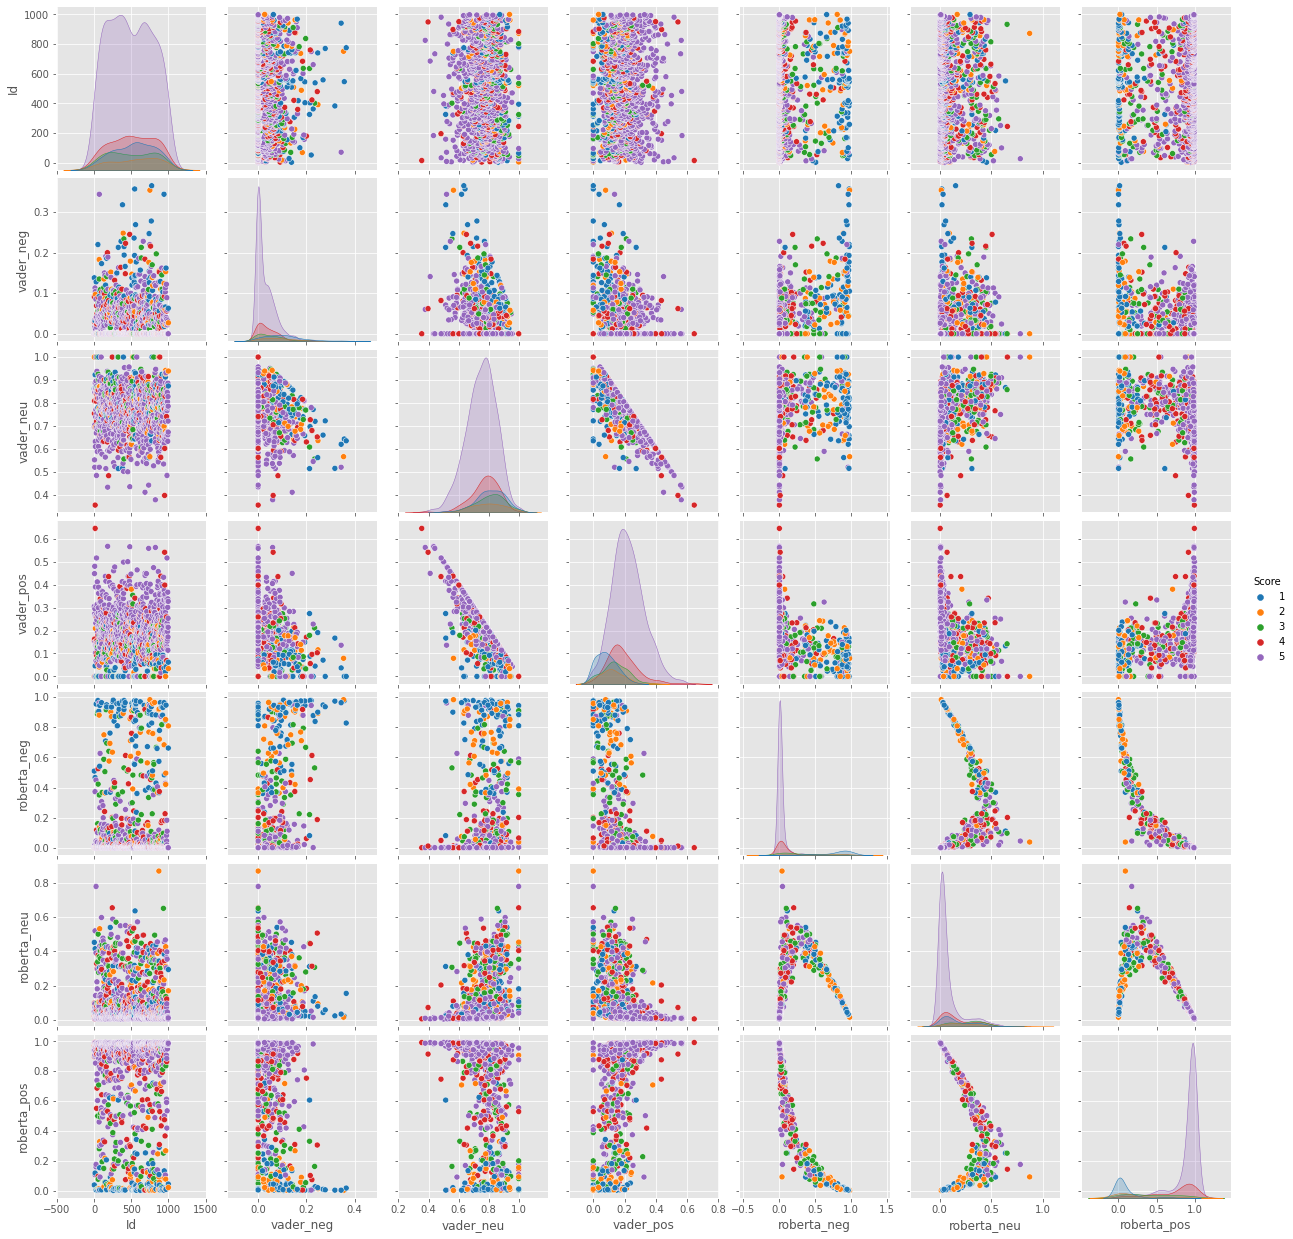

In [77]:
sns.pairplot(data = results, 
            vars = ['Id', 'vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue = 'Score',
             palette = 'tab10')
plt.show()

##**Review Examples**

In [79]:
#These are those values which are stated as a positive review by the Roberta model but is a 1 star rating
results.query('Score == 1').sort_values('roberta_pos', ascending = False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [80]:
# we'll do this for VADER model aswell
results.query('Score == 1').sort_values('vader_pos', ascending = False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [84]:
#Let's do this for negative sentiment with 5 star ratings for both the models
results.query('Score == 5').sort_values('roberta_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [85]:
results.query('Score == 5').sort_values('vader_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

#**The HuggingFace Transformers Pipeline**

In [86]:
#It's a quick and an easy way to run sentiment predictions
from transformers import pipeline

In [87]:
sent_ppline = pipeline("sentiment-analysis") 

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [93]:
sent_ppline('He is a Genius')

[{'label': 'POSITIVE', 'score': 0.9998652935028076}]

In [91]:
sent_ppline('He is not a good guy')

[{'label': 'NEGATIVE', 'score': 0.9997963309288025}]

In [92]:
sent_ppline("I'm feeling ok")

[{'label': 'POSITIVE', 'score': 0.9998277425765991}]

In [95]:
sent_ppline("I don't know what to tell, I'm confused")

[{'label': 'NEGATIVE', 'score': 0.9992915391921997}]